In [1]:
import json 
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'matplotlib'

In [7]:
train_file = "../data/lince/ner/train.conll"

In [25]:
lid_dist = {
    'hi': 0, 
    'en': 0, 
    'rest': 0,
}

tag_dist = {
    "O": 0, 
    "B-PERSON": 0, 
    "I-PERSON": 0, 
    "B-ORGANISATION": 0, 
    "I-ORGANISATION": 0, 
    "B-PLACE": 0, 
    "I-PLACE": 0,
}

In [26]:
example = {
        "id": 0, 
        "sentence": [], 
        "lid": [], 
        "bio_tag": [],
    }

data = []

with open(train_file, "r") as inFile:
    for line in inFile.readlines():
        if line == "\n":
            data.append(example)

            example = {
                "id": 0, 
                "sentence": [], 
                "lid": [], 
                "bio_tag": [],
            }


            pass  

        sp = line.split()

        if len(sp) == 4 and sp[0] == "#" and sp[1] == "sent_enum":
            example['id'] = sp[3]
        
        elif len(sp) == 3:
            example['sentence'].append(sp[0])
            example['lid'].append(sp[1])
            example['bio_tag'].append(sp[2])

            lid_dist[sp[1]] += 1
            tag_dist[sp[2]] += 1
        

In [40]:
print(f'Training Examples: {len(data)}')

Training Examples: 1243


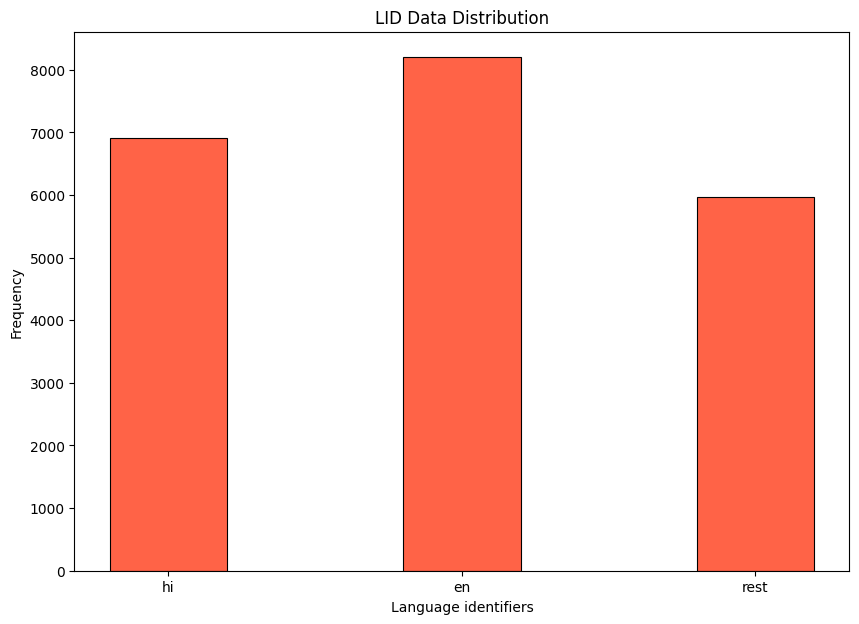

In [42]:
plt.figure(figsize=(10, 7))

plt.bar(lid_dist.keys(), lid_dist.values(), color='tomato', width=0.4, edgecolor='black', linewidth=0.8)
plt.ylabel('Frequency')
plt.xlabel('Language identifiers')
plt.title('LID Data Distribution')

plt.savefig('../assets/lince_lid_dist.png', dpi=700, format='png')

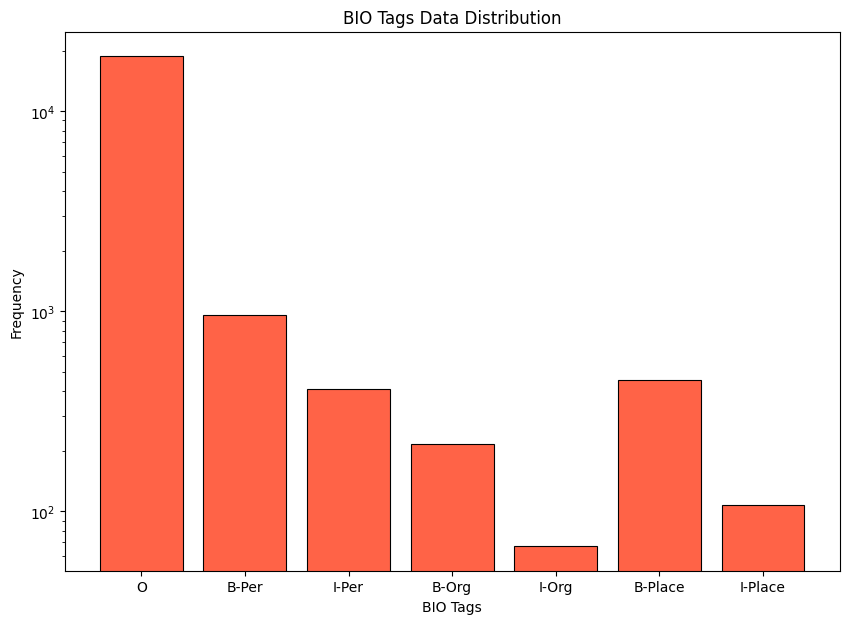

In [50]:
plt.figure(figsize=(10, 7))

plt.bar(tag_dist.keys(), tag_dist.values(), color='tomato', width=0.8, edgecolor='black', linewidth=0.8, tick_label=['O', 'B-Per', 'I-Per', 'B-Org', 'I-Org', 'B-Place', 'I-Place'])
plt.ylabel('Frequency')
plt.xlabel('BIO Tags')
plt.title('BIO Tags Data Distribution')
plt.yscale('log')

plt.savefig('../assets/lince_tag_dist.png', dpi=700, format='png')

In [52]:
with open('../data/lince/ner/train.json', 'w') as pFile:
    json_data = {
        'version': '1.0.0',
        'data': data,
    }

    json.dump(json_data, pFile, indent=2)
    pFile.close()

In [1]:
val_file = "../data/lince/ner/dev.conll"

In [2]:
example = {
        "id": 0, 
        "sentence": [], 
        "lid": [], 
        "bio_tag": [],
    }

data = []

with open(val_file, "r") as inFile:
    for line in inFile.readlines():
        if line == "\n":
            data.append(example)

            example = {
                "id": 0, 
                "sentence": [], 
                "lid": [], 
                "bio_tag": [],
            }


            pass  

        sp = line.split()

        if len(sp) == 4 and sp[0] == "#" and sp[1] == "sent_enum":
            example['id'] = sp[3]
        
        elif len(sp) == 3:
            example['sentence'].append(sp[0])
            example['lid'].append(sp[1])
            example['bio_tag'].append(sp[2])

In [3]:
len(data)

314

In [57]:
with open('../data/lince/ner/val.json', 'w') as pFile:
    json_data = {
        'version': '1.0.0',
        'data': data,
    }

    json.dump(json_data, pFile, indent=2)
    pFile.close()

In [26]:
train_data_file = open('../data/lince/ner/train.json')
val_data_file = open('../data/lince/ner/val.json')

In [27]:
train_data = json.load(train_data_file)
val_data = json.load(val_data_file)

In [28]:
for i in range(len(val_data['data'])):
    val_data['data'][i]['id'] = str(int(val_data['data'][i]['id']) + len(train_data['data']))


In [29]:
merged_data = train_data['data'] + val_data['data']

In [30]:
merged_data

[{'id': '1',
  'sentence': ['Gully',
   'cricket',
   'chal',
   'raha',
   'hain',
   'yaha',
   '"',
   '(',
   'Soniya',
   ')',
   'Gandhi',
   '"'],
  'lid': ['en',
   'en',
   'hi',
   'hi',
   'hi',
   'hi',
   'rest',
   'rest',
   'rest',
   'rest',
   'rest',
   'rest'],
  'bio_tag': ['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B-PERSON',
   'O',
   'B-PERSON',
   'O']},
 {'id': '2',
  'sentence': ['I',
   'liked',
   'a',
   '@YouTube',
   'video',
   'https://t.co/DmVqhZbdaI',
   'Kabhi',
   'Palkon',
   'Pe',
   'Aasoon',
   'Hai-',
   'Kishore',
   'Kumar',
   '-Vocal',
   'Cover',
   'By',
   'Stephen',
   'Qadir'],
  'lid': ['en',
   'en',
   'en',
   'en',
   'en',
   'en',
   'hi',
   'hi',
   'hi',
   'hi',
   'hi',
   'hi',
   'hi',
   'en',
   'en',
   'en',
   'en',
   'rest'],
  'bio_tag': ['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B-PERSON',
   'I-PERSON',
   'O',
   'O',
   'O',
   'B-PERSON',


In [31]:
merged_json_data = {
    'version': '1.0.0', 
    'data': merged_data
}

In [32]:
with open('../data/lince/ner/data.json', 'w') as pFile:
    json.dump(merged_json_data, pFile, indent=2)
    pFile.close()

In [1]:
import datasets as ds 

/home/omkar/miniconda3/envs/codemix/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = ds.load_dataset(
    'json', 
    data_files="../data/lince/ner/data.json",
    field='data'
)

Using custom data configuration default-4a4b0b8eeca40aa1
Found cached dataset json (/home/omkar/.cache/huggingface/datasets/json/default-4a4b0b8eeca40aa1/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
100%|██████████| 1/1 [00:00<00:00, 154.72it/s]


In [3]:
data

DatasetDict({
    train: Dataset({
        features: ['id', 'sentence', 'lid', 'bio_tag'],
        num_rows: 1557
    })
})

In [41]:
import numpy as np

In [87]:
from sklearn.model_selection import KFold

In [88]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [89]:
splits = kf.split(np.zeros(data['train'].num_rows))

In [90]:
all_splits = [k for k in splits]

In [93]:
train_idxs, val_idxs = all_splits[1]

In [94]:
fold_dataset = ds.DatasetDict({
        'train': data['train'].select(train_idxs),
        'validation': data['train'].select(val_idxs),
        'test': data['train'].select(val_idxs)
    })

In [86]:
for train_idxs, val_idxs in splits:
    print(val_idxs)

[  23   29   30   44   49   51   59   65   67   70   76   99  123  124
  135  141  162  168  173  175  185  198  199  203  220  237  239  240
  244  247  259  261  271  274  309  316  332  351  352  353  354  367
  374  380  381  382  411  415  416  420  429  439  468  497  500  514
  522  529  532  534  535  544  551  566  575  578  582  589  601  607
  613  634  651  664  678  679  682  694  701  714  715  722  752  764
  767  780  787  792  796  806  811  818  829  834  858  859  862  899
  904  908  914  918  930  942  958  967  979  982  993 1000 1007 1024
 1047 1055 1061 1101 1102 1105 1114 1116 1124 1132 1155 1156 1170 1173
 1182 1202 1208 1213 1214 1243 1246 1261 1272 1280 1295 1302 1333 1344
 1356 1407 1410 1432 1454 1471 1484 1496 1502 1503 1506 1510 1514 1523
 1526 1546]
[  15   32   43   56   58   63   73   78  101  107  115  128  163  184
  192  208  218  231  236  270  275  277  289  297  298  303  306  324
  331  339  342  344  350  361  366  371  394  413  422  427  428

In [59]:
for train_idxs, val_idxs in splits:
    fold_dataset = ds.DatasetDict({
        'train': data['train'].select(train_idxs),
        'validation': data['train'].select(val_idxs),
        'test': data['train'].select(val_idxs)
    })

In [60]:
fold_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'sentence', 'lid', 'bio_tag'],
        num_rows: 1402
    })
    validation: Dataset({
        features: ['id', 'sentence', 'lid', 'bio_tag'],
        num_rows: 155
    })
    test: Dataset({
        features: ['id', 'sentence', 'lid', 'bio_tag'],
        num_rows: 155
    })
})